# 3. Percolation

A simple lattice model displaying a geometrical phase transition  is percolation, where the sites (or the bonds) of a $d$-dimensional lattice are  randomly occupied with a probability $p$.
As the name suggests, the model is inspired by the percolation of a fluid through a random porous medium. Pores can allow locally the passage of the fluid, and the question is whether the fluid entering from one end of the medium is able to percolate to the other side. The answer to this question boils down to the presence of a path connecting the two ends. Percolation is relevant for a wide variety of problems involving transport in random media, including fluid flow in rocks and soil, coffee  extraction, and conduction in disordered solids.

Here we will consider both bond and site percolation depending on which element can be occupied with probability $p$. In both cases, there is a critical value $p_c$ above which there is a path connecting the two ends of the lattice. For $p <p_c$, occupied regions form a set of disconnected clusters whose average size increases with $p$ and in the limit of an infinite system diverges when $p \to p_c$.

Bond percolation (square lattice):
![image.png](attachment:714a33f3-21cc-4da0-b79f-f9880f6e4a05.png)

Site percolation (on hexagonal lattice):
![image.png](attachment:9c0faa57-1507-48c9-b7ee-d45874857886.png)

In this nootebook we will explore site and bond percolation, learn about fractal analysis and apply percolataion ideas to a practical case: the patterns of urbanization in Europe.

In [1]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import random
from scipy.optimize import curve_fit
%matplotlib inline

# 3.A Site percolation on the square lattice

Here we will use simple functions to study percolation on the square lattice.

### Exercise 3.1 Generate configuration
Write a function to generate a configuration of a square lattice as a function of p.

In [2]:
def generate_conf(p,L):
    """
    Create a configuration for the percolation
    model on a square lattice with size L


    Parameters
    ----------
    L : int
        The system size.

    p: the occupation probability

    Returns
    -------
    M : np.array, (L, L)
        an array of size (N, N).
    """
    M = np.zeros((L,L))
    for i in range(L):
      for j in range(L):
        if np.random.rand() < p:
          M[i][j] = 1
    return M

Use the function imshow() to display the configuration.

In [3]:
lattice = (generate_conf(0.5,10))

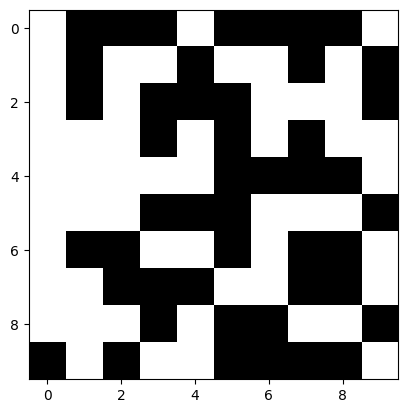

In [4]:
plt.imshow(lattice,cmap='Greys')

### Exercise 3.2: Clusters in site percolation
Find  the clusters associated to the configurations M and and display them for different values of $p$. You can adapt the function used in notebook 2 or use the function

scipy.ndimage.measurements.label()
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.label.html

As a result you should get a new LxL np.array M_colored in which each element is an integer color=1,....n_color, where n_color is the number of different clusters.

Use imshow() to plot clusters for 6 different values of $0<p<1$.

In [5]:
# Cluster function from the previous notebook
def relabel_clusters(labels):
    unique_labels = np.unique(labels)
    relabel_map = {label: idx for idx, label in enumerate(unique_labels)}
    relabeled_labels = np.vectorize(relabel_map.get)(labels)
    return relabeled_labels

def get_labels(config):
    N = len(config)
    labels = np.zeros((N, N), dtype=int)
    current_label = 1

    for i in range(N):
        for j in range(N):
            if labels[i][j] == 0:
                labels[i][j] = current_label
                current_label += 1

            # Check right neighbor
            if j < N - 1 and config[i][j] == config[i][j + 1]:
                if labels[i][j + 1] == 0:
                    labels[i][j + 1] = labels[i][j]
                else:
                    labels[labels == labels[i][j + 1]] = labels[i][j]

            # Check bottom neighbor
            if i < N - 1 and config[i][j] == config[i + 1][j]:
                if labels[i + 1][j] == 0:
                    labels[i + 1][j] = labels[i][j]
                else:
                    labels[labels == labels[i + 1][j]] = labels[i][j]

    return relabel_clusters(labels)

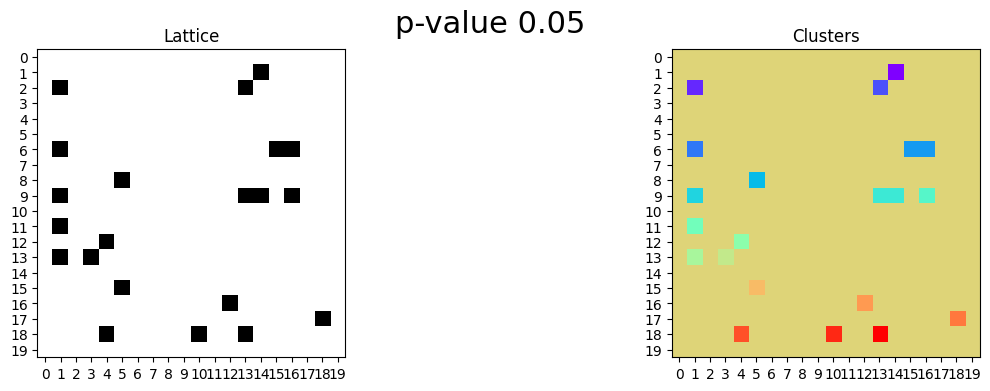

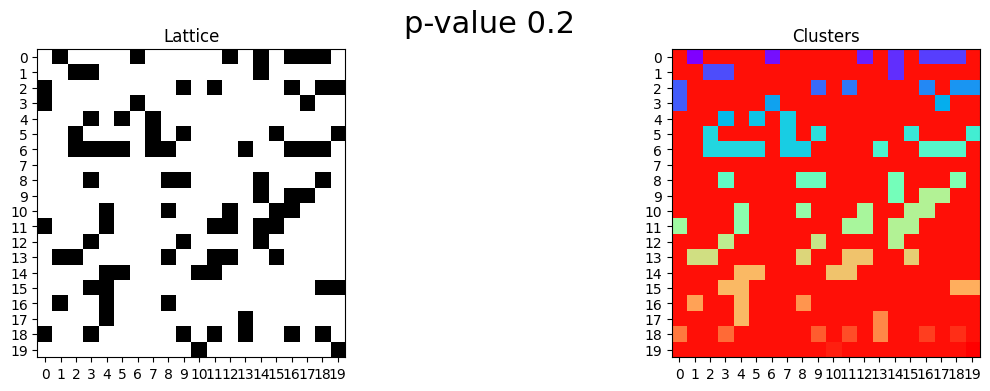

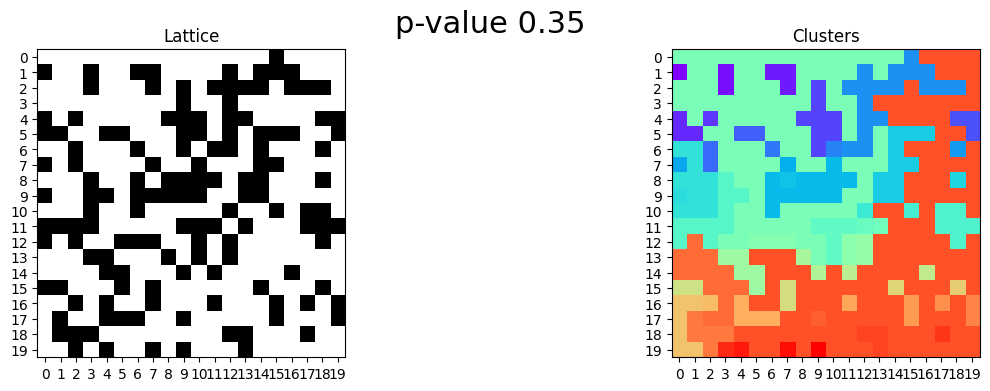

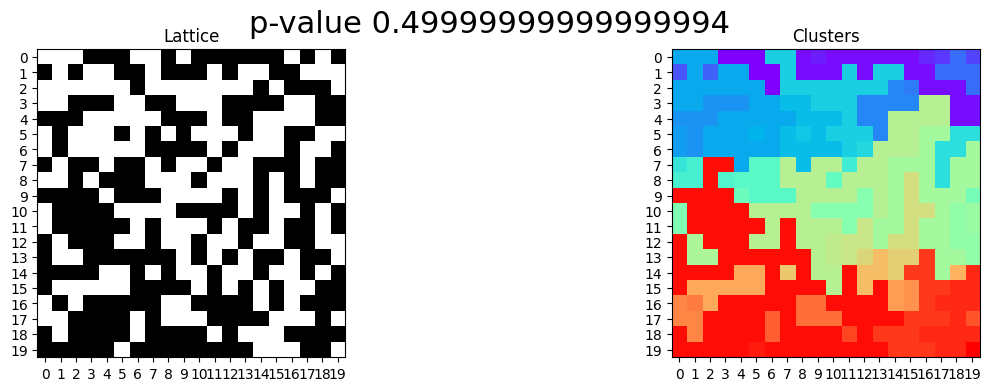

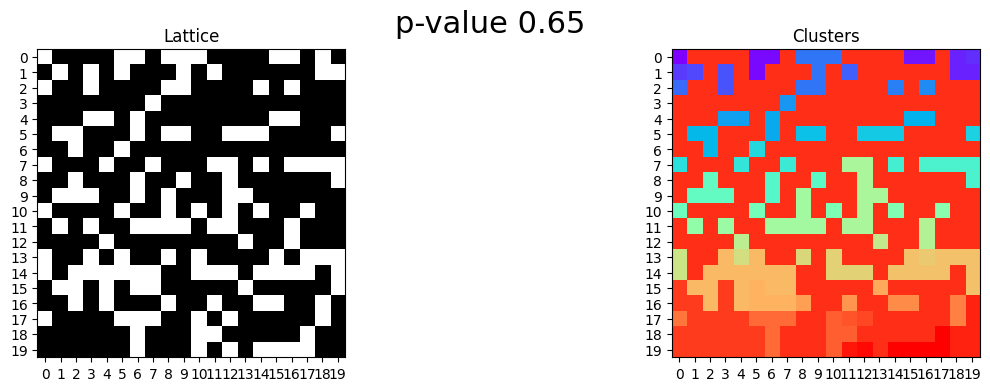

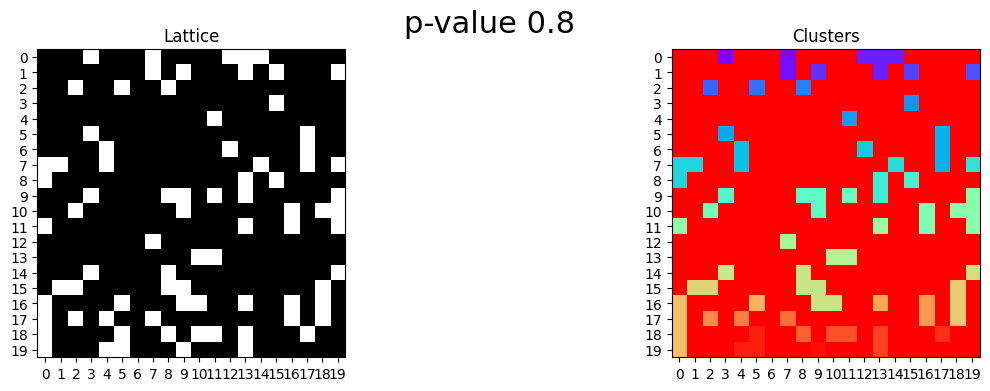

In [6]:
for i in range(30):
  if i % 5 == 0:
    prob = i * 0.03 + 0.05
    lattice = (generate_conf(prob,20))
    labels = get_labels(lattice)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    ax1.set_xticks(range(len(lattice)))
    ax1.set_yticks(range(len(lattice)))
    ax2.set_xticks(range(len(lattice)))
    ax2.set_yticks(range(len(lattice)))
    ax1.set_title("Lattice")
    ax2.set_title("Clusters")
    ax1.imshow(lattice, cmap="Greys")
    ax2.imshow(labels, cmap="rainbow", )
    unique_labels = np.unique(labels)
    fig.suptitle(f"p-value {prob}", fontsize=22)

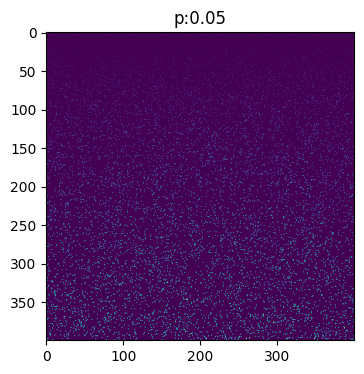

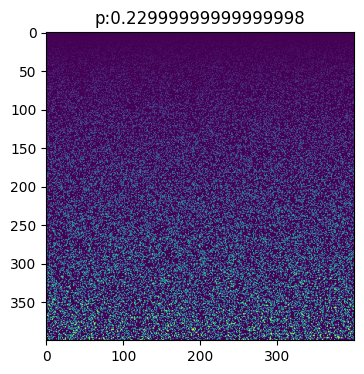

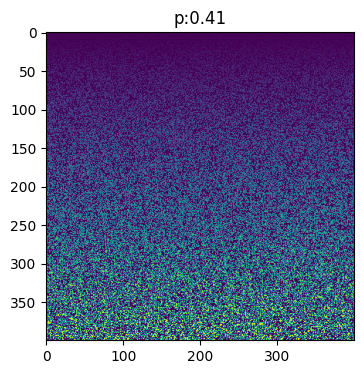

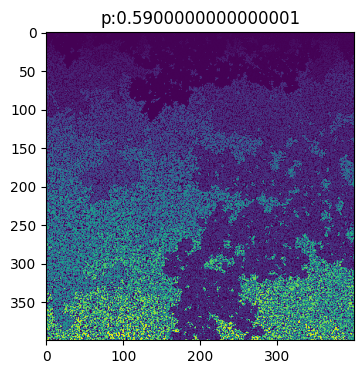

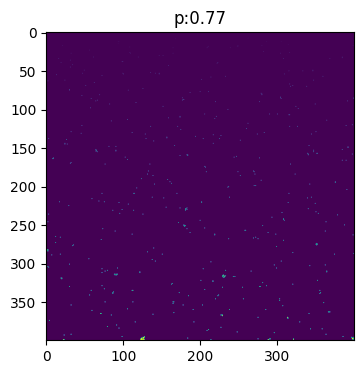

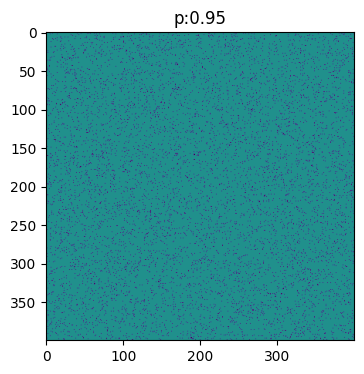

In [7]:
# Clusters in site percolation using label() function
from scipy.ndimage import label

ps = np.linspace(0.05,0.95, 6)
for p in ps:
    M = generate_conf(p,400)
    labels, num_features = label(M)
    fig, ax = plt.subplots(1, 1, figsize=(10,4))
    ax.set_title(f"p:{p}")
    ax.imshow(labels)

### Exercise 3.3: Cluster distribution
It is known that for the square lattice site percolation, the critical occupation probability is $p_c= 0.59274$ (the exact value is not known). There are, however, exact results known for many properties of percolation. In particular, it is known that at $p=p_c$ the clusters are distributed as a power law
$n(s) \sim s^{-\tau}$ with $\tau=187/91$. Verify this law by calculating the cluster size distribution $n(s)$,
for site percolation on the square lattice for a large
system size (for instance 400x400)

In [8]:
from collections import Counter

def get_sizes(labels):
    flattened_labels = labels.reshape(-1)
    label_counts = Counter(flattened_labels)
    sizes = np.array(list(label_counts.values()))
    return sizes

In [9]:
p_c = 0.59274
crit_lattice = generate_conf(p_c,800)
labels = get_labels(crit_lattice)
sizes = get_sizes(labels)

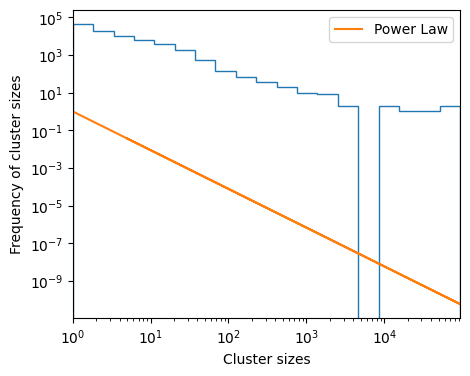

In [10]:
bins = np.geomspace(min(sizes), max(sizes), num=20)
power_law = sizes**(-(187/91))

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sizes, bins=bins, histtype="step")
ax.plot(sizes, power_law, label="Power Law")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes), max(sizes))
ax.set_xlabel("Cluster sizes")
ax.set_ylabel("Frequency of cluster sizes")
ax.legend()

### Exercise 3.4: Scaling of the order parameter
Consider now $p<p_c$ and calculate the fraction of nodes $P(p)$ in the largest cluster at a series of points $p = pc+2^{-n}$
for a large a large enough lattice and a range of
$n$ (for example between $n=2$ and $n=10$). Do a log-log plot of
$P(p)$ versus $(p-p_c)$. Theory says that
$$ P(p) \sim (p-p_c)^\beta$$
with $\beta=5/36$. You will see that the match is not perfect.

In [12]:
def get_largest_cluster_size(labels):
    cluster_sizes = Counter(labels[labels > 0])
    largest_cluster_size = max(cluster_sizes.values())
    return largest_cluster_size

In [13]:
N = 200
p_c_s = 0.59274
ps_s = np.linspace(2,10,100)
#p = p_c+2^-n
p_s = [p_c_s + (1 / (2 ** i)) for i in ps_s]
P_p_s = []
th_p_s = []
beta = 5/36

def theoretical_P_s(p, beta):
    return (p - p_c) ** beta

for i in p_s:
  lattice = generate_conf(i,N)
  labels, num_features = label(lattice)
  biggest_cluster = get_largest_cluster_size(labels)
  #P(p) as a fraction of the largest cluster over the lattice
  P_p_s.append(biggest_cluster/(N*N))
  th_p_s.append(theoretical_P_s(i, beta))

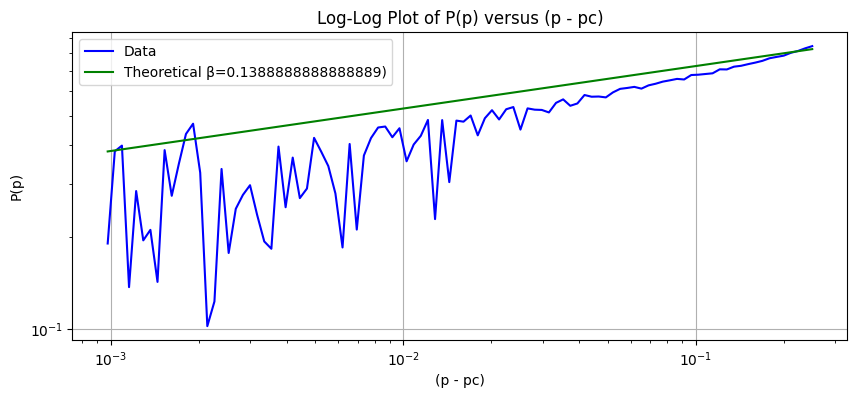

In [15]:
plt.figure(figsize=(10,4))
plt.loglog(np.array(p_s)-p_c_s, P_p_s, 'b', label='Data')
plt.loglog(np.array(p_s)-p_c_s, th_p_s, 'g', label=f'Theoretical β={beta})')
plt.xlabel('(p - pc)')
plt.ylabel('P(p)')
plt.title('Log-Log Plot of P(p) versus (p - pc)')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 3.5 - Finite size scaling
We can extract better values for rom small simulations by explicitly including the length L into our analysis.
Let $P(p| L)$ be the mean fraction of nodes in the
largest cluster for a system of size L.
On a single graph, plot $P(p;L)$ versus p for site
percolation L = 5, 10, 20, 50, and 100, focusing on
the region around $p = p_c$ where they differ from
one another. (At L = 10 you will want p to range
from 0:25 to 0:75; for L = 50 the range should be
from 0:45 to 0:55 or so.) Five or ten points will be
enough. You will discover that the sample-to-sample
variations are large (another  finite-size effct), so
average each curve over perhaps ten or twenty
realizations.

Test the following scaling function:
$$ P(p,L)= L^{-\beta/\nu} f((p-p_c)L^{1/\nu}$$
where $\nu=4/3$.  

To test you should employ a data collapse by defining $X=(p-p_c)L^{1/\nu}$ and $Y=P(p,L)L^{\beta/\nu}$ and then plotting $Y$ versus $X$ for all the values of $L$ in the same graph.

In [16]:
def calculate_PpL(L, p, num_samples=20):
    PpL_mean = []
    for _ in range(num_samples):
        config = generate_conf(p, L)
        labels, num_features = label(config)
        cluster_sizes = Counter(labels[labels > 0])

        if len(cluster_sizes) > 0:
            largest_cluster_size = max(cluster_sizes.values())
            PpL_mean.append(largest_cluster_size/(L**2))

    return np.mean(PpL_mean)

In [17]:
β = 5 / 36
ν = 4 / 3
L_values = [5, 10, 20, 50, 100]
p_values = {
    5: np.linspace(0.15, 0.85, 10),
    10: np.linspace(0.15, 0.85, 10),
    20: np.linspace(0.15, 0.85, 10),
    50: np.linspace(0.15, 0.85, 10),
    100:np.linspace(0.15, 0.85, 10)
}

PpL_values = {L: [] for L in L_values}

for L in L_values:
    for p in p_values[L]:
        PpL_values[L].append(calculate_PpL(L, p))

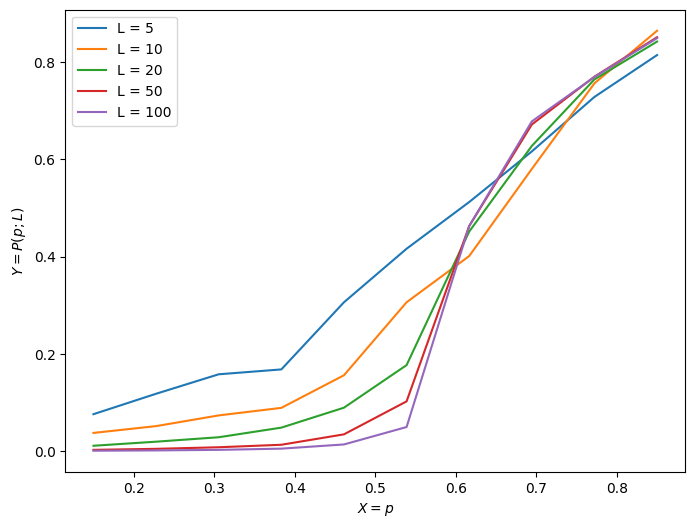

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
for L in L_values:
    ax.plot(p_values[L], PpL_values[L], label=f"L = {L}")

ax.set_xlabel(r"$X = p$")
ax.set_ylabel(r"$Y = P(p; L)$")
ax.legend()
plt.show()

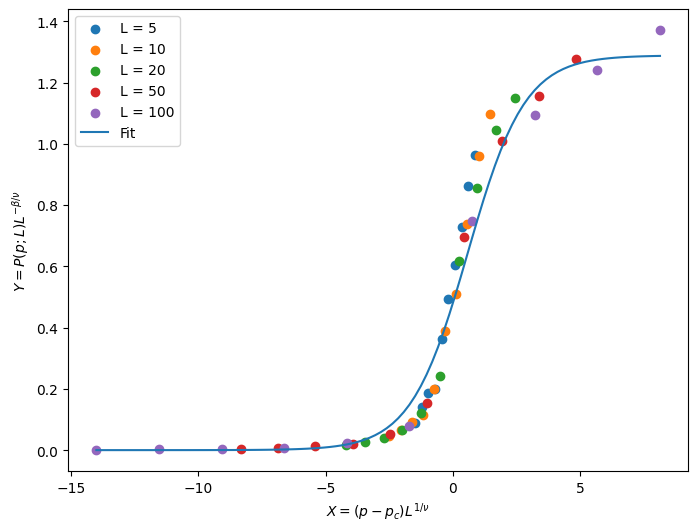

In [19]:
def scaling_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

fig, ax = plt.subplots(figsize=(8, 6))
X_values  = {}
Y_values  = {}
p_c = 0.59274

for L in L_values:
    X_values[L] = (p_values[L] - p_c) * (L**(1 / ν))
    Y_values[L] = np.array(PpL_values[L]) * (L**(β / ν))

for L in L_values:
    ax.scatter(X_values[L], Y_values[L], label=f"L = {L}")

popt, pcov = curve_fit(scaling_function, X_values[L_values[-1]], Y_values[L_values[-1]])

X_fit = np.linspace(min(X_values[L_values[-1]]), max(X_values[L_values[-1]]), 100)
Y_fit = scaling_function(X_fit, *popt)
ax.plot(X_fit, Y_fit, label="Fit")

ax.set_xlabel(r"$X = (p - p_c) L^{1/\nu}$")
ax.set_ylabel(r"$Y = P(p; L) L^{-\beta/\nu}$")
ax.legend()

plt.show()

### Exercise 3.6 - The percolating cluster
Set $p=p_c$ and generate a large configuration of the site percolation problem (at least L=400). Select the largest cluster and compute its fractal dimension using the box counting method.

![image.png](attachment:3c8e2c31-dc44-4959-9e0a-979c577fafbb.png)

The method is based on a grid made of cells of changing cell sizes $b$. Superimpose a grid f cell size $b$  with the percolation cluster and count how many cells $N(b)$ contain sites belonging to the cluster. By plotting $N(b)$ versus $b$ you should obtain $N(b) \propto b^{-D}$ where $D$ is the fractal dimension of the percolating cluster.

Follow these steps:
- create an array m_cl where m_cl[i,j]=1 if the site belongs to the largest cluster.
- write a function that counts the number of occupied boxed of size b (hint: use $L=2^K$ and $b=2^k$ with k=1,2,3...$)
- plot N(b) vs b in log-log scale and make a fit.

In [20]:
def box_counting(cluster):
    counts = []
    for k in range(1, int(np.log2(len(cluster)))):
        b = 2**k
        counts.append(np.sum([np.sum(cluster[i:i+b, j:j+b]) > 0 for i in range(0, len(cluster), b) for j in range(0, len(cluster), b)]))
    return counts

def get_largest_cluster(labels):
    cluster_sizes = np.bincount(labels.ravel())
    largest_cluster_label = np.argmax(cluster_sizes[1:]) + 1
    largest_cluster = np.where(labels == largest_cluster_label, 1, 0)
    return largest_cluster

def fractal_fit(counts,k_values,b_values):
    log_counts = np.log(counts)
    log_b_values = np.log(b_values)
    slope, intercept = np.polyfit(log_b_values, log_counts, 1)
    return -slope,intercept

log(N(b))=−D⋅log(b)

In [21]:
lattice = generate_conf(p_c,800)
labels = get_labels(lattice)
biggest_cluster = get_largest_cluster(labels)
counts = box_counting(biggest_cluster)
k_values = np.arange(1, len(counts) + 1)
b_values = 2**k_values
fractal_dim, intercept = fractal_fit(counts,k_values,b_values)

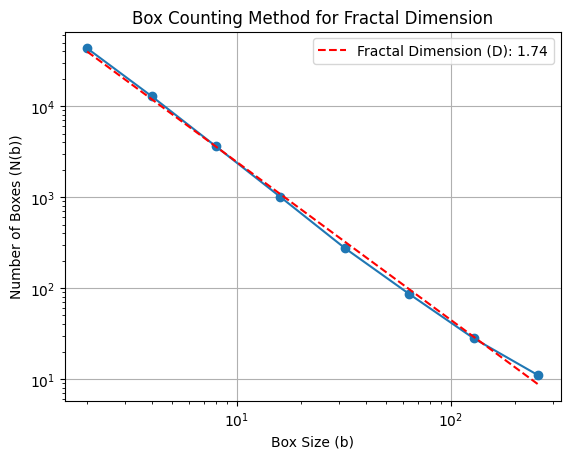

In [22]:
plt.loglog(b_values, counts, marker='o', linestyle='-')
plt.loglog(b_values, np.exp(intercept) * b_values**(-fractal_dim), 'r--', label=f'Fractal Dimension (D): {fractal_dim:.2f}')
plt.xlabel('Box Size (b)')
plt.ylabel('Number of Boxes (N(b))')
plt.title('Box Counting Method for Fractal Dimension')
plt.grid(True)
plt.legend()
plt.show()

# 3.B Bond percolation
In this part, we will use the networkx library to study bond percolation.
You can find more about the library in:
https://networkx.org/documentation/stable/

In bond percolation, we the occupation probability is defined on the bond rather than on the sites. For a 2D square lattice the critical probability is known exactly as $p_c=1/2$.



In [23]:
import networkx as nx
import numpy as np

### Exercise 3.7. Create a bond percolation problem
Write a function to create a configuration of the bond percolation
problem on a square lattice of size nxn with occupation probability p

In [24]:
def create_bond_percolation_square(n,p):
    """" Function to create a configuration of the bond percolation
    problem on a square lattice of size nxn with occupation
    probability p

    uses: networkx, numpy

    input: n, p

    output: the graph G and the positions pos
    """
    G = nx.grid_2d_graph(n, n)  # Create a grid graph of size nxn
    for edge in list(G.edges()):
        if np.random.rand() > p:  # With probability (1 - p), remove the edge
            G.remove_edge(*edge)

    pos = dict((node, node) for node in G.nodes())  # Define positions for nodes

    return G, pos

In [25]:
# create a percolation graph
n = 20
p = 0.5
G, pos = create_bond_percolation_square(n,p)

Now the lattice is stored in the graph object G and the position in pos


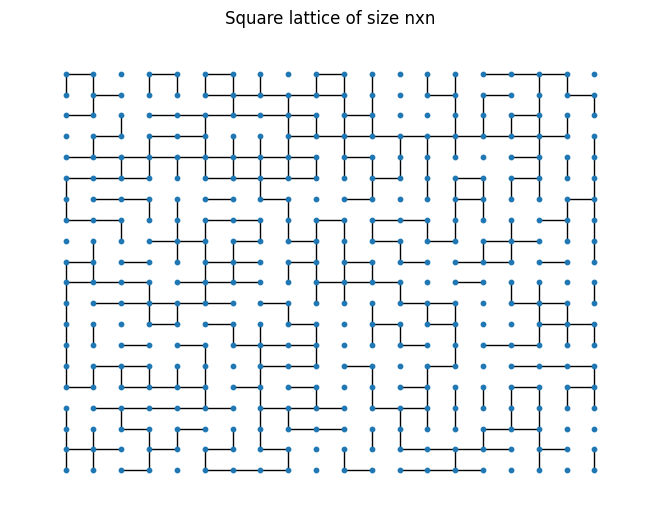

In [26]:
nx.draw(G, pos, with_labels=False, node_size=10)
plt.title('Square lattice of size nxn')
plt.show()

### Exercise 3.8. Clusters in bond percolation
Repeat Exercise 3.2 and 3.3 for the case of bond percolation. In particular:
- identify the clusters
- plot the configurations using random colors for each clusters and a selection of values of p
- compute the cluster distribution at $p=p_c=1/2$ for a large n


In [27]:
def plot_clusters(G,pos,p):
  clusters = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  color_map = [np.random.rand(3,) for _ in range(len(clusters))]
  nodes_to_plot = G.nodes()
  for i, cluster in enumerate(clusters):
        cluster_nodes = list(cluster.nodes())
        nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes, node_size=20, node_color=[color_map[i]], alpha=0.7)

  nx.draw_networkx_edges(G, pos, alpha=0.5)

  plt.title(f"Bond Percolation Configurations (p={p})")
  plt.show()
  return

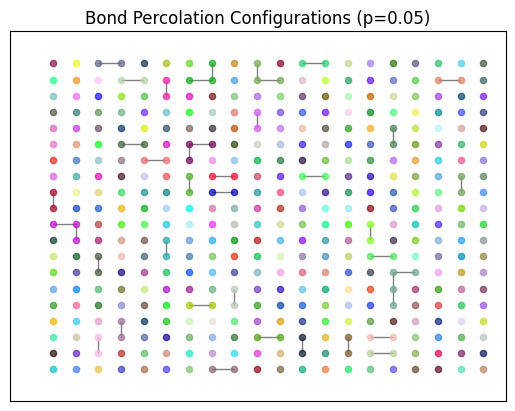

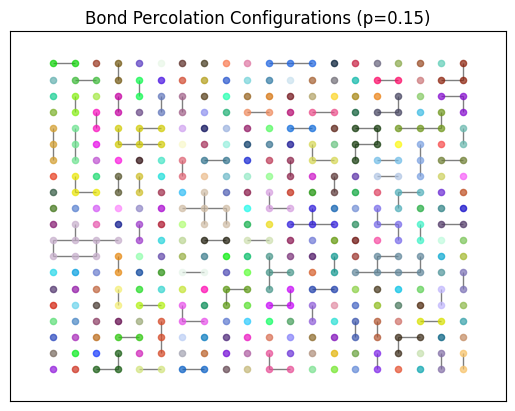

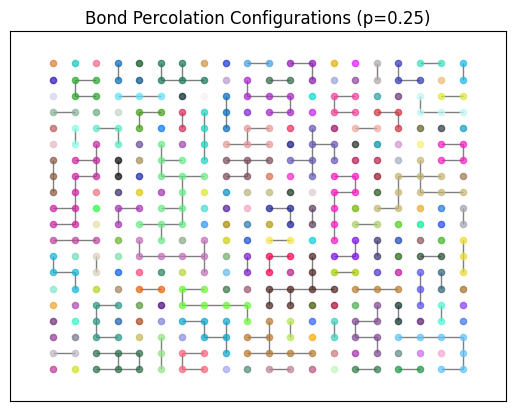

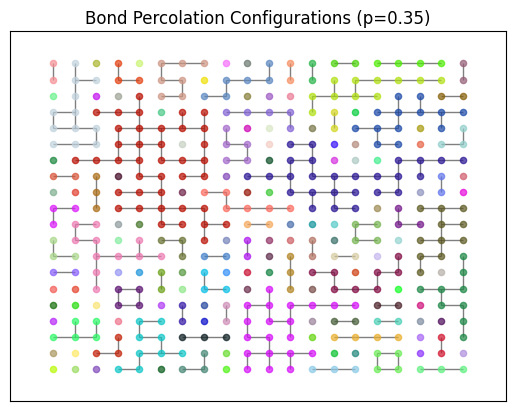

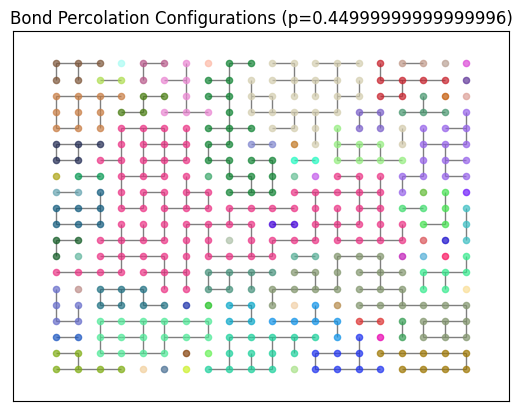

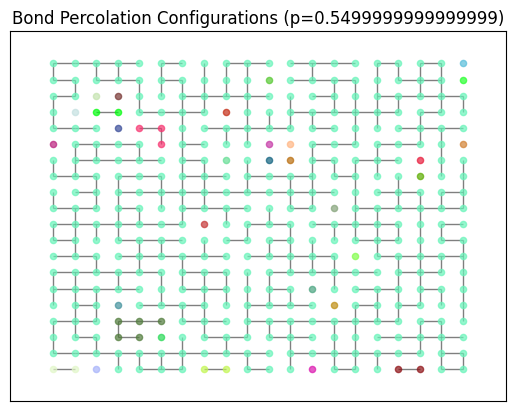

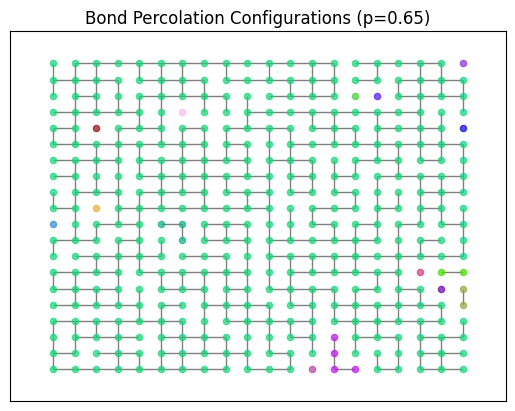

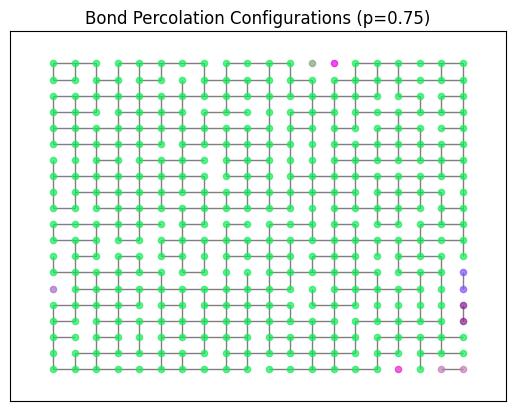

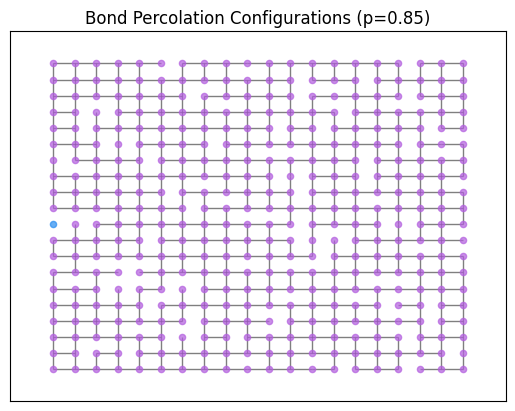

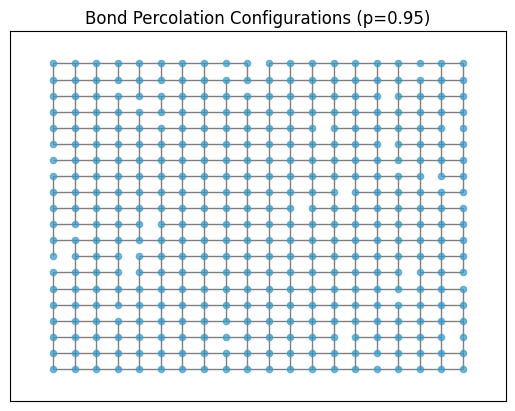

In [28]:
n = 20
ps = np.linspace(0.05,0.95,10)
for p in ps:
  G, pos= create_bond_percolation_square(n,p)
  plot_clusters(G,pos,p)

In [29]:
def get_sizes_b(clusters):
    sizes = [len(cluster.nodes()) for cluster in clusters]
    return sizes

def find_clusters(G):
    clusters = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    return clusters

In [30]:
p_c = 0.5
n = 800
G_pc, pos = create_bond_percolation_square(n, p_c)
clusters = find_clusters(G_pc)
sizes = get_sizes_b(clusters)
bins = np.geomspace(min(sizes), max(sizes), num=20)

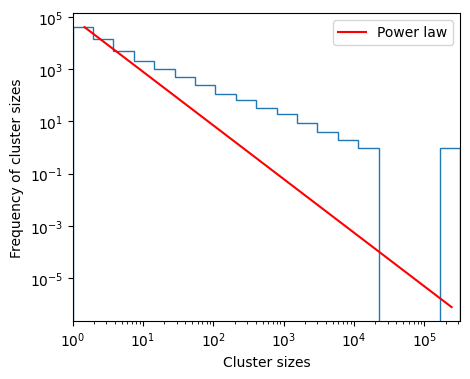

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sizes, bins=bins, histtype="step")
tau = -187/91
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes), max(sizes))
ax.set_xlabel("Cluster sizes")
ax.set_ylabel("Frequency of cluster sizes")

hist, bin_edges = np.histogram(sizes, bins=bins)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
def power_law(x, a):
    return a * np.power(x, tau)

popt, pcov = curve_fit(power_law, bin_centers, hist)
fitted_curve = power_law(bin_centers, popt)

ax.plot(bin_centers, fitted_curve, label=f"Power law", color='r')
plt.legend()
plt.show()

### Exercise 3.9. Order parameter and finite size scaling for bond percolation
Repeat Exercise 3.4 and 3.5 for the case of bond percolation. Compare the results with the case of site percolation.
Create a plot with the finite size scaling, with both site and bond percolation curves in the same graph. Do they match?



In [35]:
def largest_cluster_size(sizes):
    largest_size = max(sizes)
    return largest_size

In [36]:
pc2 = 0.5
ns = np.linspace(2,10, 100)
ps2 = [pc2 + np.power(1/2,n) for n in ns]
L = 200
y = []
ybond = []
ps1 = [p_c_s + np.power(1/2,n) for n in ns]
yth = [(p-p_c_s)**(5/36) for p in ps1]

for p in ps2:
  G, pos= create_bond_percolation_square(L,p)
  clusters = find_clusters(G)
  sizes = get_sizes_b(clusters)
  ybond.append(largest_cluster_size(sizes)/(L*L))

for i in ps1:
  lattice = generate_conf(i,L)
  labels, num_features = label(lattice)
  biggest_cluster = get_largest_cluster_size(labels)
  P_p_s.append(biggest_cluster/(N*N))
  th_p_s.append(theoretical_P_s(i, beta))

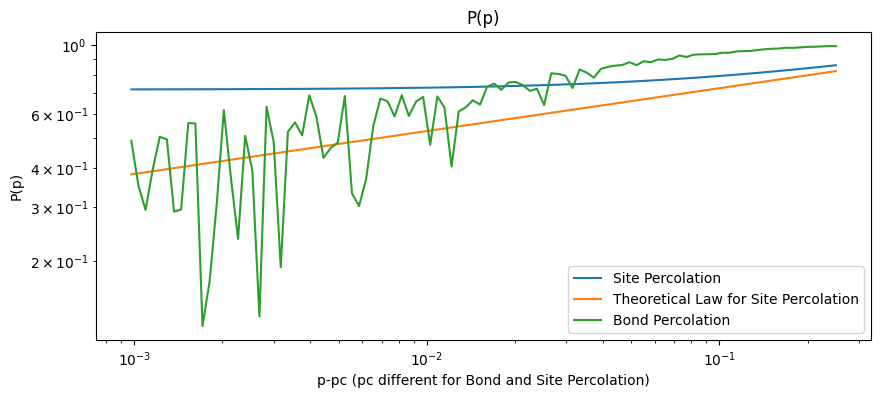

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set_title(f"P(p)")
ax.loglog(np.array(ps1)-p_c_s,th_p_s[100:], label = "Site Percolation")
ax.loglog(np.array(ps1)-p_c_s,yth, label="Theoretical Law for Site Percolation")
ax.loglog(np.array(ps2)-pc2,ybond, label="Bond Percolation")
ax.set_xlabel("p-pc (pc different for Bond and Site Percolation)")
ax.set_ylabel("P(p)")
ax.legend()

The bond percolation has more oscillation w.r.t. the site percolation, but they both approaches the Theoretical law.

In [39]:
def calculate_PpL(L, p, num_samples=20):
    PpL_mean = []
    for _ in range(num_samples):
      G, pos= create_bond_percolation_square(L,p)
      clusters = [G.subgraph(c).copy() for c in nx.connected_components(G)]
      sizes = [len(cluster.nodes()) for cluster in clusters]

      if len(sizes) > 0:
            largest_cluster_size = np.max(sizes)
            PpL_mean.append(largest_cluster_size / (L**2))

      return np.mean(PpL_mean)

In [40]:
β = 5 / 36
ν = 4 / 3
L_values_bond = [5, 10, 20, 50, 100]
p_values_bond = {
    5: np.linspace(0.15, 0.85, 10),
    10: np.linspace(0.15, 0.85, 10),
    20: np.linspace(0.15, 0.85, 10),
    50: np.linspace(0.15, 0.85, 10),
    100:np.linspace(0.15, 0.85, 10)
}

PpL_values_bond = {L: [] for L in L_values_bond}

for L in L_values_bond:
    for p in p_values_bond[L]:
        PpL_values_bond[L].append(calculate_PpL(L, p))

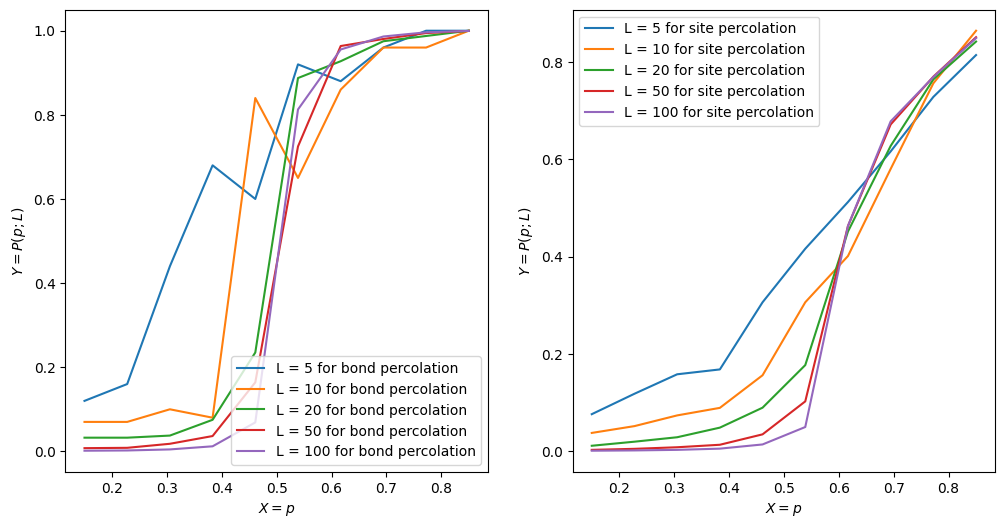

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for L in L_values_bond:
    ax1.plot(p_values_bond[L], PpL_values_bond[L], label=f"L = {L} for bond percolation")
    ax2.plot(p_values[L], PpL_values[L], label=f"L = {L} for site percolation")

ax1.set_xlabel(r"$X = p$")
ax1.set_ylabel(r"$Y = P(p; L)$")
ax1.legend()
ax2.set_xlabel(r"$X = p$")
ax2.set_ylabel(r"$Y = P(p; L)$")
ax2.legend()
plt.show()

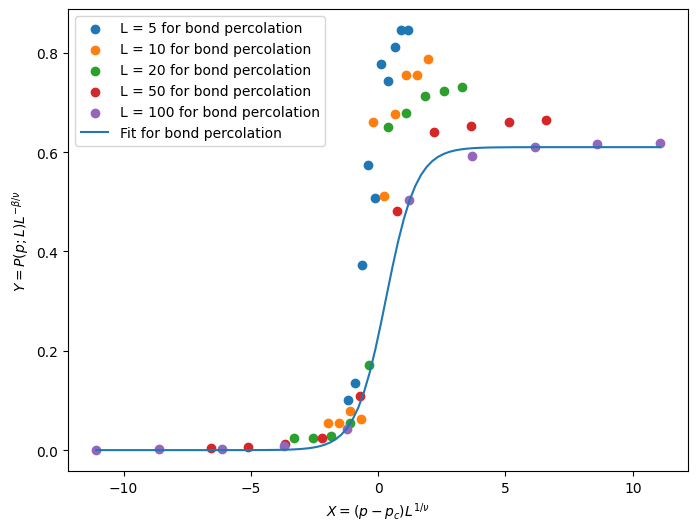

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

X_values_bond = {}
Y_values_bond = {}

for L in L_values_bond:
    X_values_bond[L] = (p_values_bond[L] - pc2) * (L**(1 / ν))
    Y_values_bond[L] = np.array(PpL_values_bond[L]) * (L**(-β / ν))

for L in L_values_bond:
    ax.scatter(X_values_bond[L], Y_values_bond[L], label=f"L = {L} for bond percolation")

popt, pcov = curve_fit(scaling_function, X_values_bond[L_values_bond[-1]], Y_values_bond[L_values_bond[-1]])

X_fit_bond = np.linspace(min(X_values_bond[L_values_bond[-1]]), max(X_values_bond[L_values_bond[-1]]), 100)
Y_fit_bond = scaling_function(X_fit_bond, *popt)
ax.plot(X_fit_bond, Y_fit_bond, label="Fit for bond percolation")

ax.set_xlabel(r"$X = (p - p_c) L^{1/\nu}$")
ax.set_ylabel(r"$Y = P(p; L) L^{-\beta/\nu}$")
ax.legend()
plt.show()

The bond percolation, as the site percolation, collaps on a single line(the brown one).

# 3.C Percolation for urban areas
Here we will apply percolation ideas to the quantification of urban boundaries, inspired by this work:

Oliveira, E.A., Furtado, V., Andrade, J.S. and Makse, H.A., 2018. A worldwide model for boundaries of urban settlements. Royal Society open science, 5(5), p.180468.
https://royalsocietypublishing.org/doi/full/10.1098/rsos.180468

Read the paper to have an idea.

Here you will do the following (corresponding to the simple city clustering algorithm): You are provided with a grid representing the population density D in Europe on a scale of 5km. You should take the grid and define a density threshold $D_0$. If $D>D_0$ the cell is considered to be part of a city, while for $D<D_0$ it is not.  The thresholded grid is now similar to a percolation problem (i.e. a matrix with elements 0 and 1).



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Excercise 3.10 Urban percolation
Study the properties of the grid as a function of $D_0$, assign cluster labels and then plot the map with a random color map (each cluster should be visualized with a different color). Find if there is a value of $D_0$ below which there is percolation (defined in some inventive way for this case).



In [44]:
# Load population data (-1 is the sea!)
urban_matrix = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/LAB COMPLEX systems/matrix_city.txt")

In [45]:
matint = np.zeros_like(urban_matrix, dtype=int)
for i in range(urban_matrix.shape[0]):
    for j in range(urban_matrix.shape[1]):
        matint[i][j] = int(urban_matrix[i][j])

In [46]:
D0 = 100
city_grid = np.where(matint > D0, 1, 0)

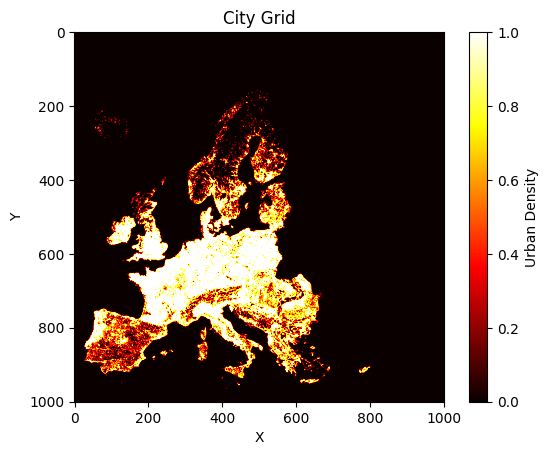

In [47]:
plt.imshow(city_grid,cmap='hot')
plt.colorbar(label='Urban Density')
plt.title('City Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [48]:
def label_clusters(matint,D0):
  city_grid = np.where(matint > D0, 1, 0)
  labeled_grid, num_clusters = label(city_grid)
  return labeled_grid,num_clusters

In [49]:
def plt_clusters(labeled_grid, D0,num_plots=1,num_cols=1,circles=False, coords=None,idx=0):
  num_rows = (num_plots + num_cols - 1)
  plt.subplot(num_rows, num_cols, idx+1)
  plt.imshow(labeled_grid, cmap='nipy_spectral')
  plt.colorbar(label='Cluster')
  plt.title(f'D0 = {d0}')
  if circles:
    for i in range(len(coords)):
      x, y = coords[i]
      plt.plot(x, y, marker='o', markersize=5, color='red')


In [50]:
D0_values = np.linspace(50,10000,50)
num_plots = len(D0_values)
num_cols = 2
num_rows = (num_plots + num_cols - 1)
plt.figure(figsize=(10, 4*num_rows))
for idx1, d0 in enumerate(D0_values):
  labels_grid,num_clusters = label_clusters(matint,d0)
  plt_clusters(labels_grid, d0, num_plots,num_cols,idx=idx1)

Output hidden; open in https://colab.research.google.com to view.

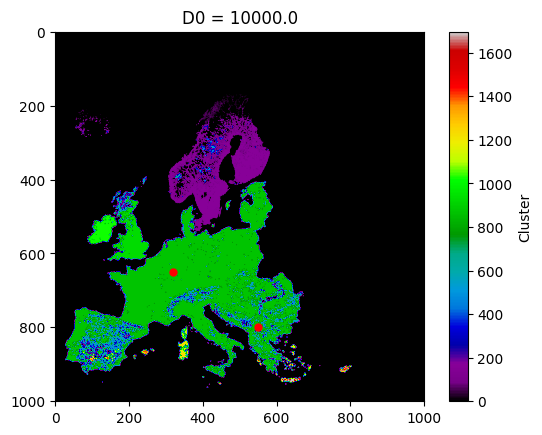

In [51]:
coords = [(320,650), (550,800)]
radius=5
D0=1
labels_grid,num_clusters = label_clusters(matint,D0)
plt_clusters(labeled_grid=labels_grid, D0=D0,circles=True, coords=coords)


Percolation occurs if there is at least one cluster that spans from top to bottom or left to right.
In this particular case, I consider as percolation when two points belong to the same cluster. In the sense that if two points are in the same path then percolation happens.

In [52]:
percolations = []
D0s = np.linspace(120,150,1000)
for D0 in D0s:
  cluster_labels, num_clusters = label_clusters(matint,D0)
  if cluster_labels[500,360] == cluster_labels[800,400] and cluster_labels[800,400]!=0:
    percolations.append(D0)
print(percolations)

[120.0, 120.03003003003003, 120.06006006006007, 120.09009009009009, 120.12012012012012, 120.15015015015015, 120.18018018018019, 120.2102102102102, 120.24024024024024, 120.27027027027027, 120.30030030030031, 120.33033033033033, 120.36036036036036, 120.3903903903904, 120.42042042042043, 120.45045045045045, 120.48048048048048, 120.51051051051051, 120.54054054054055, 120.57057057057057, 120.6006006006006, 120.63063063063063, 120.66066066066067, 120.69069069069069, 120.72072072072072, 120.75075075075075, 120.78078078078079, 120.8108108108108, 120.84084084084084, 120.87087087087087, 120.90090090090091, 120.93093093093093, 120.96096096096096, 120.990990990991, 121.02102102102103, 121.05105105105105, 121.08108108108108, 121.11111111111111, 121.14114114114115, 121.17117117117117, 121.2012012012012, 121.23123123123123, 121.26126126126127, 121.29129129129129, 121.32132132132132, 121.35135135135135, 121.38138138138139, 121.41141141141141, 121.44144144144144, 121.47147147147147, 121.50150150150151,

In [53]:
print(percolations[-1])

139.96996996996998


In this case percolation happens until $D_0$ < 140, the two points are not in the same cluster if the value of $D_0$ is greater or equal than 140.

### Excercise 3.11 Urban cluster distribution
Compute the cluster size distribution as a function of $D_0$.

In [54]:
def find_cluster_sizes(matint, D0):
    cluster_labels, num_clusters = label_clusters(matint, D0)
    cluster_sizes = Counter(cluster_labels.flatten())
    del cluster_sizes[0]
    return cluster_labels, list(cluster_sizes.values())

In [55]:
def plot_cluster_size_distribution(D0_values, cluster_size_distributions):
  fig, ax = plt.subplots(figsize=(10, 6))
  for i, sizes in enumerate(cluster_size_distributions):
    bins = np.geomspace(min(sizes), max(sizes), num=20)
    ax.hist(sizes, bins=bins, histtype="step", label=f'D0 = {D0_values[i]:.2f}')
  ax.set_xlabel("Cluster sizes")
  ax.set_ylabel("Frequency of cluster sizes")
  ax.set_title('Cluster Size Distribution for Different D0 Values')
  ax.set_xscale('log')
  ax.set_yscale('log')
  ax.legend()
  plt.show()


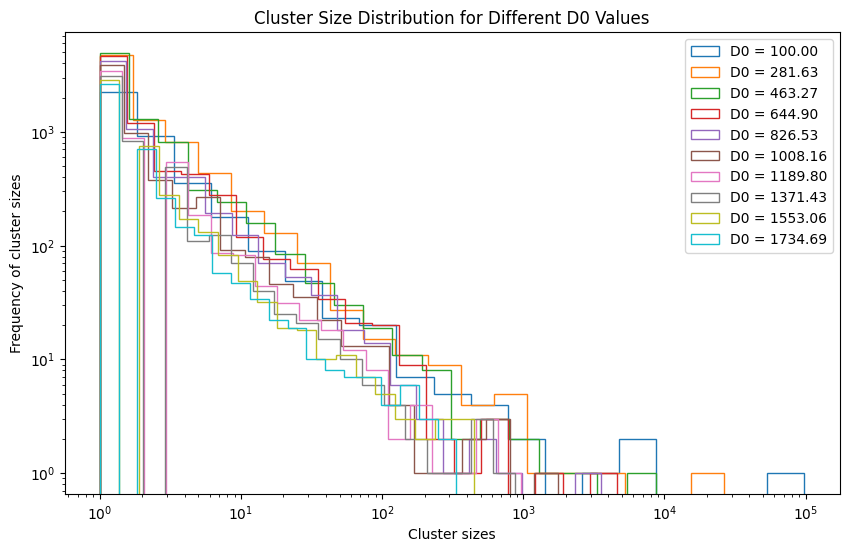

In [56]:
D0_values = np.linspace(100, 9000, 50)

cluster_size_distributions = []
counter = 0
for D0 in D0_values:
  if counter % 5 == 0:
    _, cluster_sizes = find_cluster_sizes(matint, D0)
    cluster_size_distributions.append(cluster_sizes)
  counter += 1

plot_cluster_size_distribution(D0_values, cluster_size_distributions)

The cluster size distribution is almost the same for every $D_0$: there are more clusters with a small size than clusters with a large size (for some $D_0$ the distribution is not plotted since the result would be not clear).

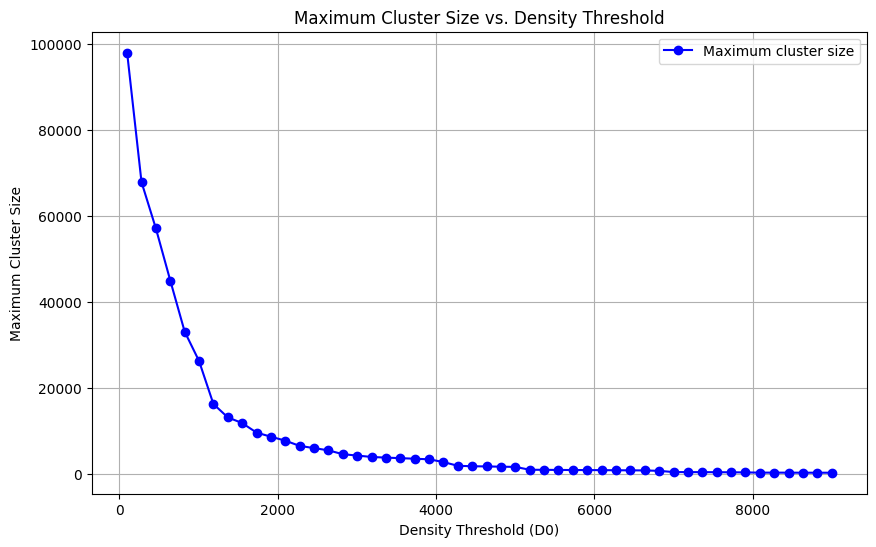

In [57]:
def find_max_size_cluster(matint, D0):
    _, cluster_sizes = find_cluster_sizes(matint, D0)
    max_cluster_size = max(cluster_sizes) if cluster_sizes else 0
    return max_cluster_size

max_cluster_sizes = []
D0_values = np.linspace(100, 9000, 50)
for D0 in D0_values:
    max_size = find_max_size_cluster(matint, D0)
    max_cluster_sizes.append(max_size)

plt.figure(figsize=(10, 6))
plt.plot(D0_values, max_cluster_sizes, color='b', marker='o', linestyle='-', label="Maximum cluster size")
plt.xlabel('Density Threshold (D0)')
plt.ylabel('Maximum Cluster Size')
plt.title('Maximum Cluster Size vs. Density Threshold')
plt.legend()
plt.grid(True)
plt.show()

There we can see that as $D_0$ increases, the size of the largest cluster becomes smaller and approaches the zero. This happens because if the threshold is excessively high, then very few cells will be considered as a part of a city, and therefore of a cluster, which translate to many clusters with a small size (the cluster is just a cell).